<a href="https://colab.research.google.com/github/Abhs1897/Machine-Learning/blob/main/Naive%20Bayes/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<b>Assumptions in Naive Bayes:</b><br>
1) Each feature in X is independent of others given Y

#Case 1: When data is categorical

In [67]:
df=pd.read_csv('play_tennis.csv')
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [68]:
df['play'].value_counts()

play
Yes    9
No     5
Name: count, dtype: int64

In [69]:
df['play'].value_counts().sum()

14

In [70]:
prob_yes=9/14
prob_no=5/14

In [71]:
df_outlook_play=pd.crosstab(df['outlook'],df['play'])
df_outlook_play

play,No,Yes
outlook,,
Overcast,0,4
Rain,2,3
Sunny,3,2


In [72]:
df_outlook_play.sum(axis=0)

play
No     5
Yes    9
dtype: int64

In [73]:
prob_overcast_no=0
prob_rain_no=2/5
prob_sunny_no=3/5

prob_overcast_yes=4/9
prob_rain_yes=3/9
prob_sunny_yes=2/9

In [74]:
df_temp_play=pd.crosstab(df['temp'],df['play'])
df_temp_play

play,No,Yes
temp,,
Cool,1,3
Hot,2,2
Mild,2,4


In [75]:
df_temp_play.sum(axis=0)

play
No     5
Yes    9
dtype: int64

In [76]:
prob_cool_no=1/5
prob_hot_no=2/5
prob_mild_no=2/5

prob_cool_yes=3/9
prob_hot_yes=2/9
prob_mild_yes=4/9

In [77]:
df_humidity_play=pd.crosstab(df['humidity'],df['play'])
df_humidity_play

play,No,Yes
humidity,,
High,4,3
Normal,1,6


In [78]:
df_humidity_play.sum(axis=0)

play
No     5
Yes    9
dtype: int64

In [79]:
prob_high_no=4/5
prob_normal_no=1/5

prob_high_yes=3/9
prob_normal_yes=6/9

In [80]:
df_wind_play=pd.crosstab(df['wind'],df['play'])
df_wind_play

play,No,Yes
wind,,
Strong,3,3
Weak,2,6


In [81]:
df_wind_play.sum(axis=0)

play
No     5
Yes    9
dtype: int64

In [82]:
prob_strong_no=3/5
prob_weak_no=2/5

prob_strong_yes=3/9
prob_weak_yes=6/9

In [83]:
#Calculating prob of outlook=sunny, temp=hot , wind=weak

#Calculate prob of yes
prob_newdata_yes=prob_yes*prob_sunny_yes*prob_hot_yes*prob_weak_yes

#Calculate prob of no
prob_newdata_no=prob_no*prob_sunny_no*prob_hot_no*prob_weak_no

if(prob_newdata_yes>prob_newdata_no):
  print("New data point belongs to 'yes' class ie Play=yes")
else:
  print("New data point belons to 'no' class ie Play=no")

New data point belons to 'no' class ie Play=no


#Case 2: When data is numerical

In [84]:
#Data follows gaussian distribution
data=pd.read_csv("Breast_cancer_data.csv")
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


<Axes: >

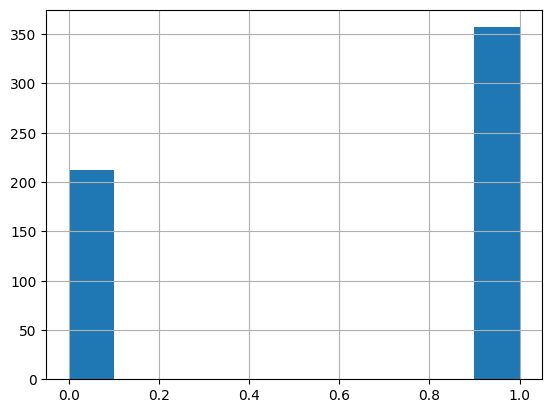

In [85]:
data["diagnosis"].hist()

<Axes: >

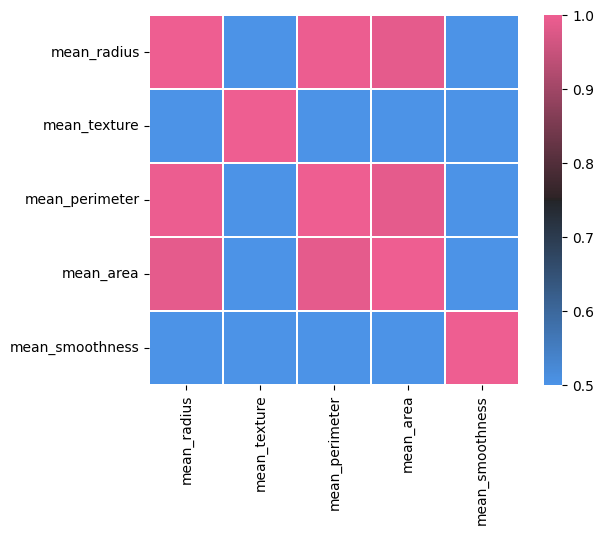

In [86]:
#Checking if features are independent of each other
correlation_matrix=data.iloc[:,:-1].corr(method="pearson")
cmap=sns.diverging_palette(250,354,80,60,center="dark",as_cmap=True)
sns.heatmap(correlation_matrix,vmax=1,vmin=0.5,cmap=cmap,square=True,linewidths=.2)

From the above heatmap, we can see that mean_radius,mean_perimeter and mean_area are correlated to some features, hence we can ignore these features

In [87]:
new_data=data[["mean_texture","mean_smoothness","diagnosis"]]
new_data.head()

,mean_texture,mean_smoothness,diagnosis
0,10.38,0.11840,0
1,17.77,0.08474,0
2,21.25,0.10960,0
3,20.38,0.14250,0
4,14.34,0.10030,0


<Axes: xlabel='mean_smoothness', ylabel='Count'>

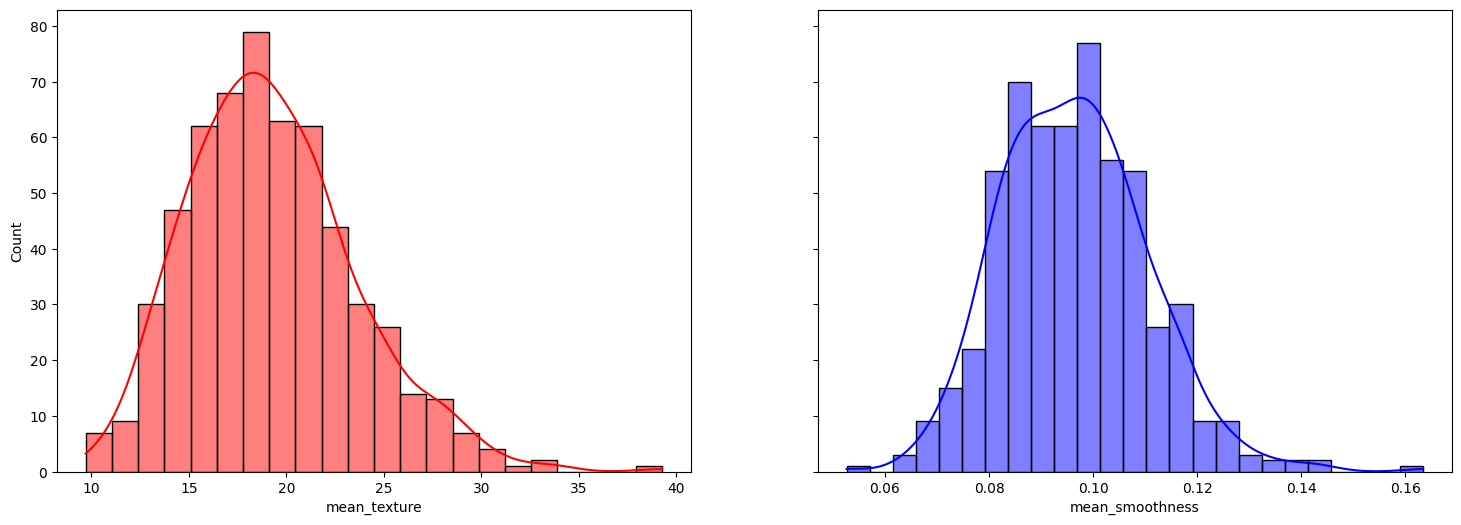

In [88]:
#Checking distribution of our features
fig,ax=plt.subplots(1,2,figsize=(18,6),sharey=True)
sns.histplot(new_data,ax=ax[0],x="mean_texture",kde=True,color='r')
sns.histplot(new_data,ax=ax[1],x="mean_smoothness",kde=True,color='b')

###Calculating P(Y=y) for all y

In [119]:
def calculate_prior_prob(df,Y):
  # classes=sorted(list(df[Y].unique()))
  # class_frequency=df[Y].value_counts()
  # ans=[]
  # n=len(df)
  # for i in classes:
  #   ans.append(class_frequency[i]/n)
  # return ans
  classes = sorted(list(df[Y].unique()))
  prior = []
  for i in classes:
      prior.append(len(df[df[Y]==i])/len(df))
  return prior

###Calculating Likelihood prob using normal distribution, since the features follow normal distribution

In [104]:
def calculate_likelihood_prob(df,feature,data,y,class_label):
  cols=list(df.columns)
  df=df[df[y]==class_label]
  mean,std=df[feature].mean(),df[feature].std()
  return  (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((data-mean)**2 / (2 * std**2 )))

In [117]:
# def naive_bayes(X_train,X_test,y):

#   #Extract features from df
#   features=list(X_train.columns)[:-1]

#   #Calculate prior and extract classes
#   prior_prob=calculate_prior_prob(X_train,y)

#   y_pred=[]
#   #looping over data sample
#   for x in X_test:
#     classes = sorted(list(X_train[y].unique()))
#     likelihood=[1]*len(classes)
#     for i in range(len(classes)):
#       for j in range(len(features)):
#         likelihood[i]*=calculate_likelihood_prob(X_train,features[j],x[j],y,classes[i])

#     post_prob=[1]*len(classes)
#     for i in range(len(classes)):
#       post_prob[i]=likelihood[i]*prior_prob[i]
#     y_pred.append(np.argmax(post_prob))
#   return np.array(y_pred)
def naive_bayes(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior_prob(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_prob(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [112]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(new_data,test_size=0.2,random_state=41)

In [121]:
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes(train, X_test,"diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[26 14]
 [11 63]]
0.8344370860927152
